# CSE 494 Homework 2

## Question 1

In [39]:
import pandas as pd
import json
import numpy as np

In [40]:
cve_json_data2016 = json.load(open('nvdcve-1.0-2016.json'))
cve_json_data2015 = json.load(open('nvdcve-1.0-2015.json'))

In [41]:
for key in cve_json_data2016:
    print(key)

CVE_data_timestamp
CVE_data_version
CVE_Items
CVE_data_format
CVE_data_numberOfCVEs
CVE_data_type


In [42]:
#collect the exhaustive list of keys for the feature extraction part
keys_set = set()

for idx in range(len(cve_json_data2016['CVE_Items'])):
    cve_data = cve_json_data2016['CVE_Items'][idx]
    
    for key in cve_data['cve']:
        keys_set.add(key)
    

for k in keys_set:
    print(k)

description
data_type
affects
data_format
problemtype
data_version
references
CVE_data_meta


In [145]:
cve_feat = pd.DataFrame(columns = list(keys_set))
columns_to_select = ['']

#extract  everything under CVE_items and store it in a dict variable from each JSON file

#extract IDs for 2016 cves
cve_nvd_ids2016 = []
for idx in range(len(cve_json_data2016['CVE_Items'])):
    cve_data2016 = cve_json_data2016['CVE_Items'][idx]
    
    cve_metadata2016 = cve_data2016['cve']['CVE_data_meta']
    
    cve_nvd_ids2016.append(cve_metadata2016['ID'])

# print(type(cve_nvd_ids2016[0]))
# print(cve_nvd_ids2016)
# print(cve_data['cve']['affects'])

#extract IDs for 2015 cves
cve_nvd_ids2015 = []
for idx in range(len(cve_json_data2015['CVE_Items'])):
    cve_data2015 = cve_json_data2015['CVE_Items'][idx]
    
    cve_metadata2015 = cve_data2015['cve']['CVE_data_meta']
    
    cve_nvd_ids2015.append(cve_metadata2015['ID'])

# print(type(cve_nvd_ids2015[0]))
# print(cve_nvd_ids2015)

#iterate over all of the IDs in the CSV file and find the corresponding features in the pandas dataframe 
CSV = pd.read_csv('./CVE_list_hw2.csv')
# print len(CSV)
CVES = {}
for c in range(len(CSV)):
    temp = CSV['CVE'][c]
    CVES[temp] = CSV['isExploited'][c]
    
# CVES = CSV['CVE'].tolist()
# exploits = CSV['isExploited'].tolist()
# print CVES
contains2016 = {}
contains2015 = {}
for c in cve_nvd_ids2016:
    if (c in CVES):
        contains2016[c] = CVES.get(c)
for c in cve_nvd_ids2015:
    if(c in CVES):
        if(c not in contains2016):
            contains2015[c] = CVES.get(c)
print(contains2016)
# print(contains2015)
#add one extra column in the datframe to indicate whether or not it is exploited


{u'CVE-2016-0079': 0, u'CVE-2016-0078': 0, u'CVE-2016-0077': 0, u'CVE-2016-0076': 0, u'CVE-2016-0075': 0, u'CVE-2016-0074': 0, u'CVE-2016-0073': 0, u'CVE-2016-0072': 0, u'CVE-2016-0071': 0, u'CVE-2016-0070': 0, u'CVE-2016-0777': 1, u'CVE-2016-3242': 1, u'CVE-2016-0382': 0, u'CVE-2016-0284': 0, u'CVE-2016-0285': 0, u'CVE-2016-0286': 0, u'CVE-2016-0287': 0, u'CVE-2016-0280': 0, u'CVE-2016-0281': 0, u'CVE-2016-0282': 0, u'CVE-2016-0283': 0, u'CVE-2016-0474': 0, u'CVE-2016-0288': 0, u'CVE-2016-0289': 0, u'CVE-2016-0931': 1, u'CVE-2016-0937': 1, u'CVE-2016-7869': 1, u'CVE-2016-6415': 1, u'CVE-2016-4173': 1, u'CVE-2016-1007': 1, u'CVE-2016-4171': 1, u'CVE-2016-3234': 1, u'CVE-2016-6253': 1, u'CVE-2016-6957': 1, u'CVE-2016-6954': 1, u'CVE-2016-6897': 1, u'CVE-2016-0728': 1, u'CVE-2016-3078': 1, u'CVE-2016-1909': 1, u'CVE-2016-0255': 0, u'CVE-2016-0254': 0, u'CVE-2016-0253': 0, u'CVE-2016-0252': 0, u'CVE-2016-7203': 1, u'CVE-2016-0250': 0, u'CVE-2016-0154': 0, u'CVE-2016-0155': 1, u'CVE-2016-0

In [208]:
new16 = {}
new15 = {}
for c in contains2016:
    json = {'isExploited':contains2016.get(c)}
    new16[c]=json
    
for c in contains2015:
    json = {'isExploited':contains2015.get(c)}
    new15[c]=json

bmV3_2016 = {}
bmV3_2015 = {}

bmV2_2016 = {}
bmV2_2015 = {}
    
    
for c in contains2016:
    for idx in range(len(cve_json_data2016['CVE_Items'])):
        if(cve_json_data2016['CVE_Items'][idx]['cve']['CVE_data_meta']['ID'] == c):
#             if(cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']):
            try:
#                 print contains2016.get(c)
                json = {'ID':c,
                        'version_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['version'],
                        'vectorString_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['vectorString'],
                        'attackVector_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackVector'],
                        'attackComplexity_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackComplexity'],
                        'privilegesRequired_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['privilegesRequired'],
                        'userInteraction_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['userInteraction'],
                        'scope_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['scope'],
                        'confidentialityImpact_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['confidentialityImpact'],
                        'integrityImpact_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['integrityImpact'],
                        'availabilityImpact_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['availabilityImpact'],
                        'baseScore_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseScore'],
                        'baseSeverity_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseSeverity'],
                        'exploitabilityScore_V3':cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['exploitabilityScore'],
                        'impactScore_V3':cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['impactScore'],
                        'version_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['version'],
                        'vectorString_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['vectorString'],
                        'accessVector_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessVector'],
                        'accessComplexity_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessComplexity'],
                        'authentication_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['authentication'],
                        'confidentialityImpact_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['confidentialityImpact'],
                        'integrityImpact_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['integrityImpact'],
                        'availabilityImpact_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['availabilityImpact'],
                        'baseScore_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['baseScore'],
                        'exploitabilityScore_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['exploitabilityScore'],
                        'impactScore_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['impactScore'],
                        'isExploited': str(contains2016.get(c))
                       }
#                 print('success')
                bmV3_2016[c]=json
            except KeyError:
                n = 0
#             if(cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']):
for c in contains2015:
    for idx in range(len(cve_json_data2015['CVE_Items'])):
        if(cve_json_data2015['CVE_Items'][idx]['cve']['CVE_data_meta']['ID'] == c):
#             if(cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']):
            try:
#                 print contains2015.get(c)
                json = {'ID':c,
                        'version_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['version'],
                        'vectorString_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['vectorString'],
                        'attackVector_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackVector'],
                        'attackComplexity_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackComplexity'],
                        'privilegesRequired_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['privilegesRequired'],
                        'userInteraction_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['userInteraction'],
                        'scope_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['scope'],
                        'confidentialityImpact_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['confidentialityImpact'],
                        'integrityImpact_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['integrityImpact'],
                        'availabilityImpact_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['availabilityImpact'],
                        'baseScore_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseScore'],
                        'baseSeverity_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseSeverity'],
                        'exploitabilityScore_V3':cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['exploitabilityScore'],
                        'impactScore_V3':cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['impactScore'],
                        'version_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['version'],
                        'vectorString_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['vectorString'],
                        'accessVector_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessVector'],
                        'accessComplexity_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessComplexity'],
                        'authentication_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['authentication'],
                        'confidentialityImpact_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['confidentialityImpact'],
                        'integrityImpact_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['integrityImpact'],
                        'availabilityImpact_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['availabilityImpact'],
                        'baseScore_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['baseScore'],
                        'exploitabilityScore_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['exploitabilityScore'],
                        'impactScore_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['impactScore'],
                        'isExploited': str(contains2015.get(c))
                       }
                bmV3_2015[c]=json
            except KeyError:
                n = 0
#             if(cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']):

#             print(cve_json_data2016['CVE_Items'][idx][])
# print(cve_json_data2016['CVE_Items'][2]['impact']['baseMetricV3'])
# print bmV3_2016
cols = ['exploitabilityScore_V3','impactScore_V3','exploitabilityScore_V2','impactScore_V2','version_V3','vectorString_V3','attackVector_V3','attackComplexity_V3','privilegesRequired_V3','userInteraction_V3','scope_V3',
 'confidentialityImpact_V3','integrityImpact_V3','availabilityImpact_V3','baseScore_V3','baseSeverity_V3',
       'version_V2','vectorString_V2','accessVector_V2','accessComplexity_V2','authentication_V2','confidentialityImpact_V2','integrityImpact_V2','availabilityImpact_V2','baseScore_V2','isExploited']
# cols = ['version_V3','attackVector_V3','attackComplexity_V3','privilegesRequired_V3','userInteraction_V3','scope_V3',
#  'confidentialityImpact_V3','integrityImpact_V3','availabilityImpact_V3','baseScore_V3','baseSeverity_V3',
#        'version_V2','accessVector_V2','accessComplexity_V2','authentication_V2','confidentialityImpact_V2','integrityImpact_V2','availabilityImpact_V2','baseScore_V2','isExploited']


# cols = ['version_V3','attackVector_V3','attackComplexity_V3','privilegesRequired_V3','userInteraction_V3','scope_V3',
#  'confidentialityImpact_V3','integrityImpact_V3','availabilityImpact_V3','baseScore_V3','baseSeverity_V3',
#        'version_V2','accessVector_V2','accessComplexity_V2','authentication_V2','confidentialityImpact_V2','integrityImpact_V2','availabilityImpact_V2','baseScore_V2','isExploited']
categorical_features = ['vectorString_V3','vectorString_V2','attackVector_V3','attackComplexity_V3','privilegesRequired_V3','userInteraction_V3','scope_V3',
 'confidentialityImpact_V3','integrityImpact_V3','availabilityImpact_V3','baseSeverity_V3','accessVector_V2','accessComplexity_V2','authentication_V2','confidentialityImpact_V2','integrityImpact_V2','availabilityImpact_V2']

fdf = pd.DataFrame(columns = cols)
for b in bmV3_2016:
    fdf.loc[b] = pd.Series(bmV3_2016.get(b))
# #     fdf.loc[b] = pd.Series({'isExploited':contains2016.get(b)})

for b in bmV3_2015:
    fdf.loc[b] = pd.Series(bmV3_2015.get(b))
#     fdf.loc[b] = pd.Series({'isExploited':contains2015.get(b)})


for feat in categorical_features:
    fdf = pd.concat([fdf, pd.get_dummies(fdf[feat], prefix=feat)],axis=1)
    del fdf[feat]

print fdf.head()
# for b in bmV3_2015:
#     fdf.loc[b] = pd.Series(bmV3_2015.get(b))
# print contains2016.keys()

# for c in fdf['']
# for c in new16:
#     print f
#     if(f in contains2016.keys()):
#     fdf.loc[c] = pd.Series(new16.get(c))
#     elif(f in contains2015.keys()):
#     fdf.loc[f] = pd.Series({'isExploited':contains2015.get(f)})
# for c in new15:
#     fdf.loc[c] = pd.Series(new15.get(c))
# print fdf.head()
# print fdf['isExploited']


               exploitabilityScore_V3  impactScore_V3  exploitabilityScore_V2  \
CVE-2016-0079                     1.3             3.6                     3.9   
CVE-2016-0077                     2.8             1.4                     8.6   
CVE-2016-0075                     1.8             3.6                     3.9   
CVE-2016-0073                     1.3             3.6                     3.9   
CVE-2016-0072                     2.8             5.9                     8.6   

               impactScore_V2 version_V3  baseScore_V3 version_V2  \
CVE-2016-0079             2.9        3.0           5.0        2.0   
CVE-2016-0077             2.9        3.0           4.3        2.0   
CVE-2016-0075             2.9        3.0           5.5        2.0   
CVE-2016-0073             2.9        3.0           5.0        2.0   
CVE-2016-0072            10.0        3.0           8.8        2.0   

               baseScore_V2 isExploited  \
CVE-2016-0079           2.1           0   
CVE-2016-007

In [209]:



# for c in contains2016:
#     for idx in range(len(cve_json_data2016['CVE_Items'])):
#         if(cve_json_data2016['CVE_Items'][idx]['cve']['CVE_data_meta']['ID'] == c):
# #             if(cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']):
#             try:
#                 json = {'version_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['version'],
#                         'vectorString_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['vectorString'],
#                         'attackVector_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackVector'],
#                         'attackComplexity_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackComplexity'],
#                         'privilegesRequired_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['privilegesRequired'],
#                         'userInteraction_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['userInteraction'],
#                         'scope_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['scope'],
#                         'confidentialityImpact_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['confidentialityImpact'],
#                         'integrityImpact_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['integrityImpact'],
#                         'availabilityImpact_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['availabilityImpact'],
#                         'baseScore_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseScore'],
#                         'baseSeverity_V3': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseSeverity']}
#                 bmV3_2016[c]=json
#             except KeyError:
#                 n = 0
            
#             try:
#                 json = {'version_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV2']['version'],
#                         'vectorString_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['vectorString'],
#                         'accessVector_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessVector'],
#                         'accessComplexity_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessComplexity'],
#                         'authentication_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['authentication'],
#                         'confidentialityImpact_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['confidentialityImpact'],
#                         'integrityImpact_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['integrityImpact'],
#                         'availabilityImpact_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['availabilityImpact'],
#                         'baseScore_V2': cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['baseScore']
#                        }
#                 bmV2_2016[c] = json
# #             if(cve_json_data2016['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']):
# for c in contains2015:
#     for idx in range(len(cve_json_data2015['CVE_Items'])):
#         if(cve_json_data2015['CVE_Items'][idx]['cve']['CVE_data_meta']['ID'] == c):
# #             if(cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']):
#             try:
#                 json = {'version_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['version'],
#                         'vectorString_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['vectorString'],
#                         'attackVector_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackVector'],
#                         'attackComplexity_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['attackComplexity'],
#                         'privilegesRequired_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['privilegesRequired'],
#                         'userInteraction_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['userInteraction'],
#                         'scope_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['scope'],
#                         'confidentialityImpact_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['confidentialityImpact'],
#                         'integrityImpact_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['integrityImpact'],
#                         'availabilityImpact_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['availabilityImpact'],
#                         'baseScore_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseScore'],
#                         'baseSeverity_V3': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV3']['baseSeverity']
#                        }
#                 bmV3_2015[c]=json
#             except KeyError:
#                             n = 0
#             try:
#                 json = {'version_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV3']['cvssV2']['version'],
#                         'vectorString_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['vectorString'],
#                         'accessVector_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessVector'],
#                         'accessComplexity_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['accessComplexity'],
#                         'authentication_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['authentication'],
#                         'confidentialityImpact_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['confidentialityImpact'],
#                         'integrityImpact_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['integrityImpact'],
#                         'availabilityImpact_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['availabilityImpact'],
#                         'baseScore_V2': cve_json_data2015['CVE_Items'][idx]['impact']['baseMetricV2']['cvssV2']['baseScore']
#                        }
#                 bmV2_2015[c]=json
#             except KeyError:
#                 n = 0

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import KFold # import KFold
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt


KFold(n_splits=6, random_state=None, shuffle=False)
(0.8517335226773636, 0.8857444717444718, 0.8633923223896108)


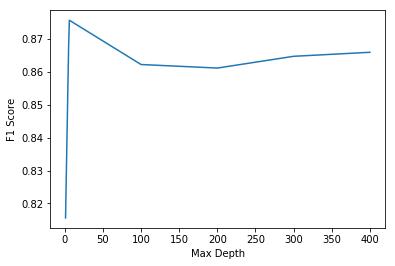

In [333]:
X = np.array(fdf.loc[:, fdf.columns != 'isExploited'])
y = np.array(fdf['isExploited'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, random_state = 100)

kf = KFold(n_splits=6) # Define the split - into 5 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf) 


dtree = DecisionTreeClassifier(criterion='gini',max_depth=200)

avg_p=0.
avg_r=0.
avg_f1=0.

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dtree.fit(X_train,y_train)
    
    y_pred = dtree.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)

    #p, r, f1, s has a matrix of two values for each fold (first one is 0, second one is 1)
    avg_p += p[1]
    avg_r += r[1]
    avg_f1 += f1[1]

print(avg_p/5., avg_r/5., avg_f1/5.)
# print (p, r, f1, s)

plt.plot([1, 5, 6, 100, 200, 300, 400], [0.8155863139185904, 0.8672669362686862, 0.875680102863954, 0.8622212516405557, 0.861145254012834, 0.8647163011455061, 0.8659377769350654])
plt.ylabel('F1 Score')
plt.xlabel('Max Depth')

plt.show()

In [334]:
def tree_properties(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold


    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "\t",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    print()

In [335]:

tree_properties(dtree)

The binary tree structure has 103 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 7] <= 7.349999904632568 else to node 72.
	node=1 test node: go to node 2 if X[:, 1] <= 3.5 else to node 13.
		node=2 test node: go to node 3 if X[:, 7] <= 1.9999999403953552 else to node 4.
			node=3 leaf node.
			node=4 test node: go to node 5 if X[:, 35] <= 0.5 else to node 12.
				node=5 test node: go to node 6 if X[:, 165] <= 0.5 else to node 11.
					node=6 test node: go to node 7 if X[:, 85] <= 0.5 else to node 10.
						node=7 test node: go to node 8 if X[:, 18] <= 0.5 else to node 9.
							node=8 leaf node.
							node=9 leaf node.
						node=10 leaf node.
					node=11 leaf node.
				node=12 leaf node.
		node=13 test node: go to node 14 if X[:, 165] <= 0.5 else to node 69.
			node=14 test node: go to node 15 if X[:, 7] <= 4.150000095367432 else to node 18.
				node=15 test node: go to node 16 if X[:, 55] <= 0.5 else to node 17.
					node=16 leaf node.
					node=

KFold(n_splits=6, random_state=None, shuffle=False)
(0.8586741226304794, 0.8473120393120392, 0.8478649332340673)


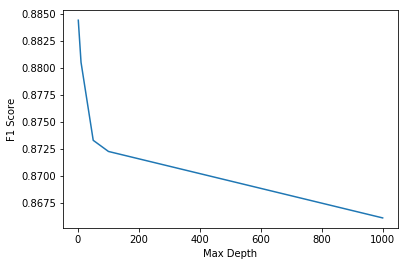

In [317]:
from sklearn.linear_model import LogisticRegression
X = np.array(fdf.loc[:, fdf.columns != 'isExploited'])
y = np.array(fdf['isExploited'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, random_state = 100)

kf = KFold(n_splits=6) # Define the split - into 5 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf) 
model = LogisticRegression(C=0.2,tol=1e-4, max_iter=200,n_jobs=4, penalty='l1')

avg_p=0.
avg_r=0.
avg_f1=0.

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
    
    avg_p += p[1]
    avg_r += r[1]
    avg_f1 += f1[1]

print(avg_p/5., avg_r/5., avg_f1/5.)


plt.plot([1000, 100, 50, 10, 1], [0.8660935516008672, 0.8722585871804949, 0.8732916082352702, 0.8805247620840486, 0.8844305345903992])
plt.ylabel('F1 Score')
plt.xlabel('Max Depth')

plt.show()

In [330]:
from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier(n_estimators=100)
X = np.array(fdf.loc[:, fdf.columns != 'isExploited'])
y = np.array(fdf['isExploited'])
#splitting data set into 70-30 split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, random_state = 100)

kf = KFold(n_splits=6) # Define the split - into 5 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf) 

avg_p=0.
avg_r=0.
avg_f1=0.

nsimu = 21
f1_cum=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
#     rfc = RandomForestClassifier(n_estimators=i*5, max_depth=None,criterion='entropy')
    rfc = RandomForestClassifier(n_estimators=100, max_depth=400,criterion='entropy')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
#     print p[1]
    f1_cum[i] += f1[1]
    ntree[i]=i*5
    
    avg_p += p[1]
    avg_r += r[1]
    avg_f1 += f1[1]

print(p[1], r[1], f1[1])

f1_cum = np.array(f1_cum)
f1_cum /= nsimu
print(f1_cum)

KFold(n_splits=6, random_state=None, shuffle=False)
(0.6829268292682927, 0.7777777777777778, 0.7272727272727273)
[0.         0.03463203 0.03418803 0.03463203 0.03508772 0.03392042
 0.03508772 0.03428571 0.03428571 0.03428571 0.03474903 0.03508772
 0.03463203 0.03508772 0.03508772 0.03428571 0.03474903 0.03474903
 0.03474903 0.03463203 0.03463203]
